### Importing Required Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
warnings.filterwarnings("ignore")

## Importing Datasets & performing EDA

### Users

In [2]:
users = pd.read_csv("Users.csv", encoding='latin-1')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [3]:
# shape of the data

users.shape

(278858, 3)

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [6]:
# Checking duplicated values

users.loc[users.duplicated()]

,User-ID,Location,Age


<Axes: >

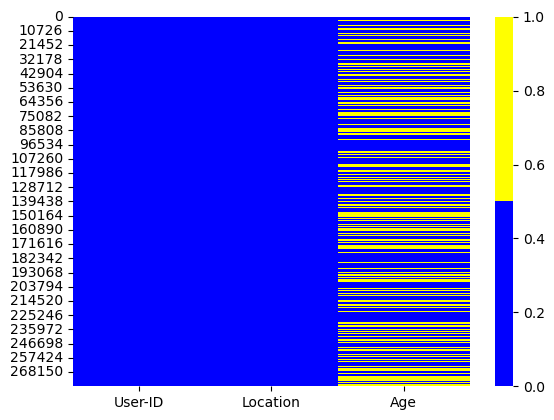

In [7]:
# Checking Missing values

cols = users.columns 
colours = ['blue', 'yellow'] # yellow is missing. blue is not missing.
sns.heatmap(users[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
# Checking Null values

users.loc[users['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [9]:
mean = users['Age'].mean()
print(mean)

34.75143370454978


In [10]:
# mean impuation on null values

users['Age'] = users['Age'].fillna(users['Age'].mean())
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


#### Outliers

<Axes: xlabel='Age', ylabel='Density'>

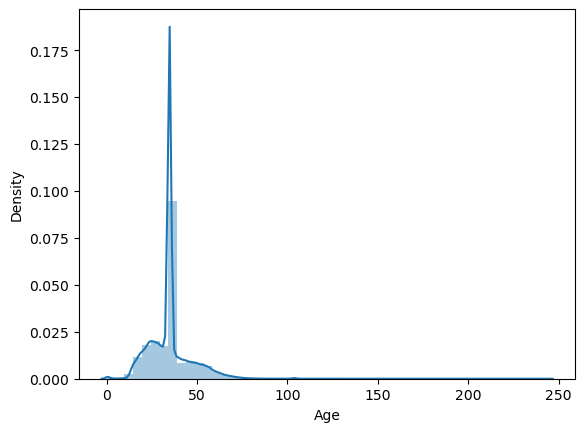

In [12]:
# distplot

sns.distplot(users['Age'])

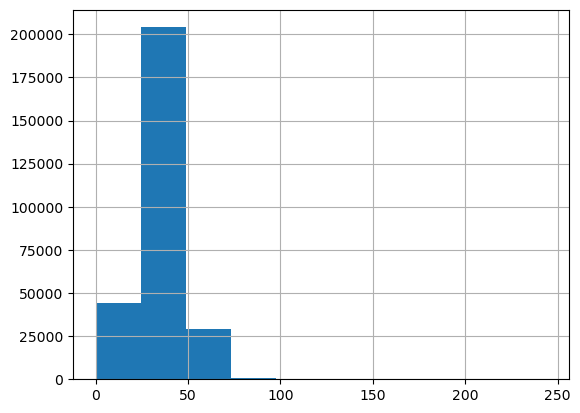

In [13]:
# Histogram

users['Age'].hist()
plt.show()

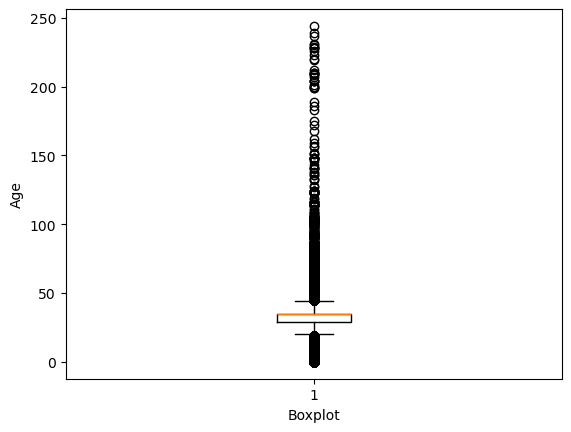

In [14]:
# Boxplot 

plt.boxplot(users['Age'])
plt.xlabel('Boxplot')
plt.ylabel('Age')
plt.show()

In [15]:
# Locations

print(users.Location.unique())

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


In [16]:
# Location data is not suitable to interpret the information

for i in users:
    users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [17]:
users.Country.nunique()

529

In [18]:
# Dropping the Location

users.drop('Location',axis=1,inplace=True)

In [19]:
users.head()

,User-ID,Age,Country
0,1,34.751434,usa
1,2,18.000000,usa
2,3,34.751434,russia
3,4,17.000000,portugal
4,5,34.751434,united kingdom


In [20]:
users.isnull().sum()

User-ID      0
Age          0
Country    369
dtype: int64

In [21]:
users['Country']=users['Country'].astype('str')

In [22]:
a = list(users.Country.unique())
a = set(a)
a = list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [23]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


In [24]:
print(users.Country.nunique())

510


Text(0.5, 1.0, 'Count of users Country wise')

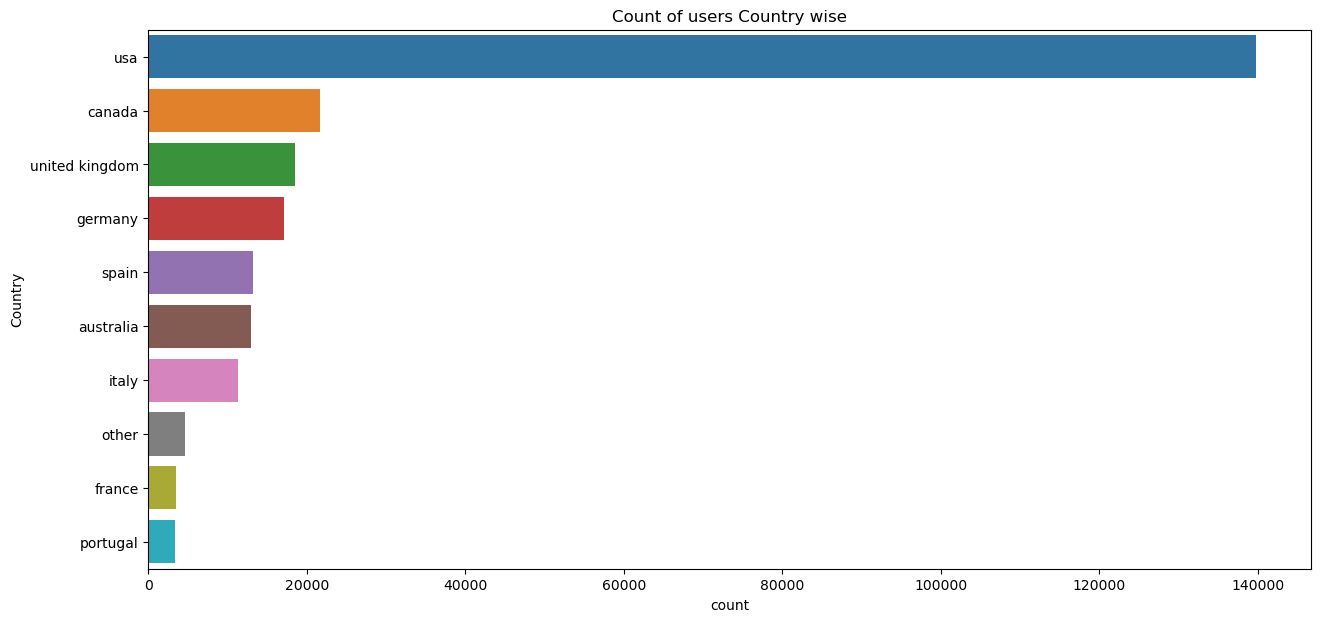

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country', data=users, order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

In [26]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

### Books

In [27]:
books = pd.read_csv("Books.csv", encoding='latin-1')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [28]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [29]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242131,102022,202,16806,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [30]:
# checking duplicated values

books.loc[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [31]:
top_books = books['Book-Title'].value_counts().head(10)
top_books.index

Index(['Selected Poems', 'Little Women', 'Wuthering Heights', 'Dracula',
       'Adventures of Huckleberry Finn', 'The Secret Garden', 'Jane Eyre',
       'Pride and Prejudice', 'The Night Before Christmas',
       'Great Expectations'],
      dtype='object', name='Book-Title')

<Axes: ylabel='Book-Title'>

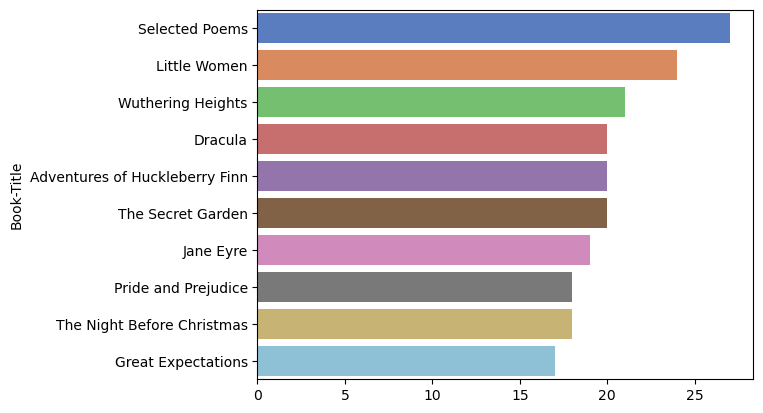

In [32]:
sns.barplot(x=top_books.values, y=top_books.index, palette='muted')

In [33]:
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64

In [34]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [35]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271358 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


Text(0.5, 1.0, 'Top 10 Authors')

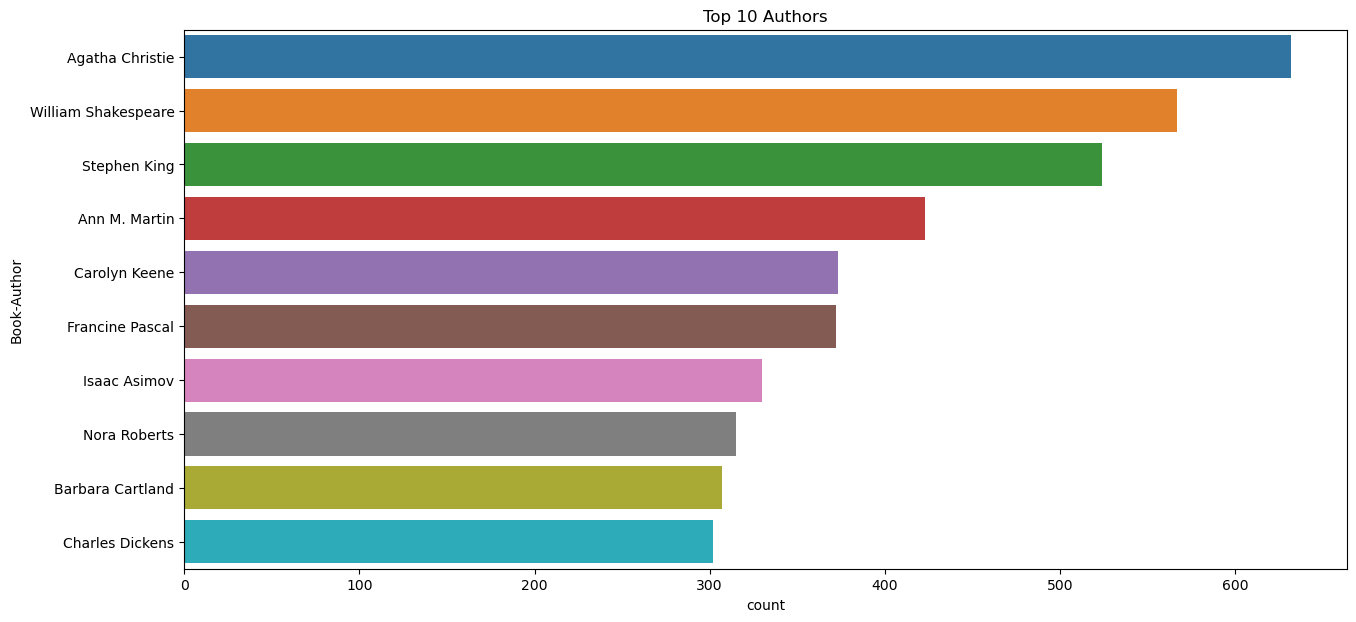

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

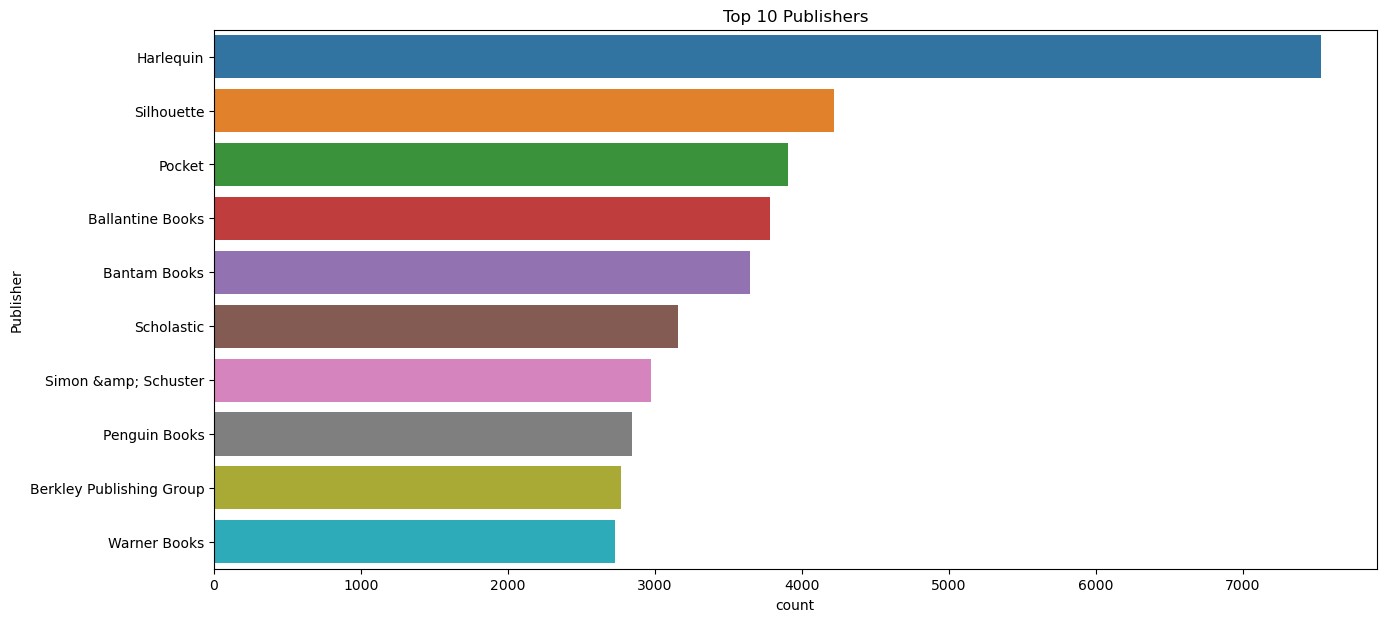

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [38]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('str')
a = list(books['Year-Of-Publication'].unique())
a = set(a)
a = list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0.0', '1376.0', '1378.0', '1806.0', '1897.0', '1900.0', '1901.0', '1902.0', '1904.0', '1906.0', '1908.0', '1909.0', '1910.0', '1911.0', '1914.0', '1917.0', '1919.0', '1920.0', '1921.0', '1922.0', '1923.0', '1924.0', '1925.0', '1926.0', '1927.0', '1928.0', '1929.0', '1930.0', '1931.0', '1932.0', '1933.0', '1934.0', '1935.0', '1936.0', '1937.0', '1938.0', '1939.0', '1940.0', '1941.0', '1942.0', '1943.0', '1944.0', '1945.0', '1946.0', '1947.0', '1948.0', '1949.0', '1950.0', '1951.0', '1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0', '2

In [39]:
books['Book-Author'].fillna('other',inplace=True)

In [40]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [41]:
books.Publisher.fillna('other',inplace=True)

In [42]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [43]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [44]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


### Ratings

In [45]:
ratings = pd.read_csv("Ratings.csv", encoding="latin-1")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1048570,250764,0451410777,0
1048571,250764,0452264464,8
1048572,250764,048623715X,0
1048573,250764,0486256588,0


In [46]:
ratings['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
104999        1
105002        1
105008        1
105014        1
123969        1
Name: count, Length: 95513, dtype: int64

In [47]:
ratings['User-ID'].unique().shape

(95513,)

In [48]:
x = ratings['User-ID'].value_counts() > 200
x[x]

User-ID
11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
28634     True
59727     True
188951    True
155916    True
44296     True
Name: count, Length: 815, dtype: bool

In [49]:
y = x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
        88793,  33145, 116122,   9856,  73681,  28634,  59727, 188951, 155916,
        44296],
      dtype='int64', name='User-ID', length=815)

In [50]:
ratings = ratings[ratings['User-ID'].isin(y)]

In [51]:
ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1048570,250764,0451410777,0
1048571,250764,0452264464,8
1048572,250764,048623715X,0
1048573,250764,0486256588,0


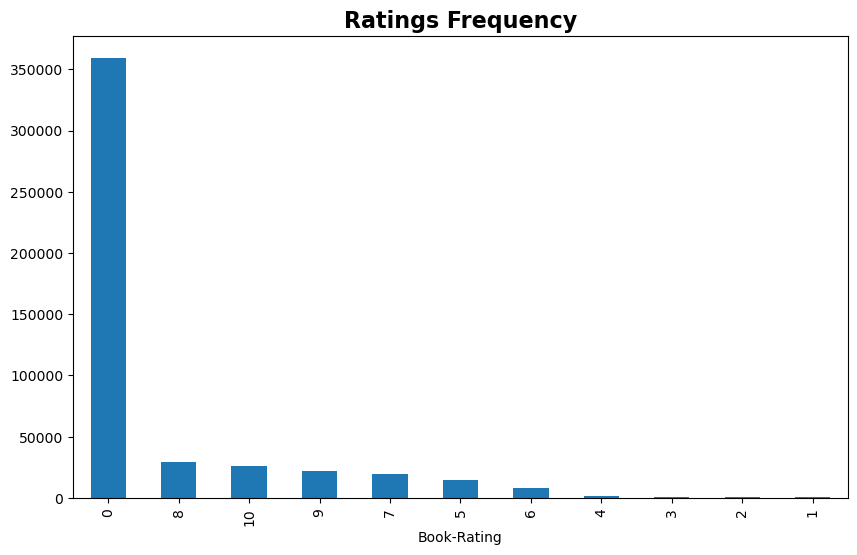

In [52]:
plt.figure(figsize=(10,6), dpi=100)
ratings['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 16, fontweight = 'bold')
plt.show()

### Consolidating Datasets

In [53]:
ratings_with_books = ratings.merge(books,on = 'ISBN')
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
446753,250764,0440236681,0,Empires of Sand,David W. Ball,2001.0,Dell Publishing Company
446754,250764,0451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988.0,New Amer Library (Mm)
446755,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications
446756,250764,0486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988.0,Dover Publications


In [54]:
num_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [55]:
num_rating.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [56]:
num_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)

In [57]:
num_rating.head()

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [58]:
final_ratings=ratings_with_books.merge(num_rating,on = 'Book-Title')

In [59]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74


In [60]:
final_ratings.shape

(446758, 8)

In [61]:
final_ratings = final_ratings[final_ratings['num_of_rating'] > 50]

In [62]:
final_ratings.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [63]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
...,...,...,...,...,...,...,...,...
210414,198699,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210415,225087,0743439651,10,Still Waters,Jennifer Lauck,2001.0,Atria,75
210416,242299,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210417,127233,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),75


In [64]:
final_ratings = final_ratings.rename({'User-ID' : 'userid','Book-Title' : 'booktitle','Book-Rating' : 'bookrating'},axis=1)

In [65]:
final_ratings.drop_duplicates(['userid','booktitle'],inplace=True)

In [66]:
final_ratings

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
...,...,...,...,...,...,...,...,...
210414,198699,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210415,225087,0743439651,10,Still Waters,Jennifer Lauck,2001.0,Atria,75
210416,242299,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210417,127233,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),75


In [108]:
final_ratings.to_csv("final_ratings.csv")

## Model Building

### User-Item Collaborative Filtering

In [67]:
# Now let us create the pivot table

pivot_table = final_ratings.pivot_table(index='userid',
                                   columns='booktitle',
                                   values='bookrating')

In [68]:
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Filling Null values

pivot_table.fillna(0, inplace=True)

In [70]:
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Calculating Cosine Similarity between Users

user_sim = 1 - pairwise_distances(pivot_table.values,metric='cosine')
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.12370028, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12370028, 1.        , ..., 0.        , 0.        ,
        0.06275062],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.06275062, ..., 0.        , 0.        ,
        1.        ]])

In [72]:
#Store the results in a dataframe

user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,794,795,796,797,798,799,800,801,802,803
0,1.000000,0.0000,0.000000,0.118987,0.0,0.217181,0.000000,0.000000,0.000000,0.227212,...,0.067976,0.089932,0.075765,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,1.0000,0.123700,0.000000,0.0,0.000000,0.000000,0.343401,0.000000,0.000000,...,0.084842,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.1237,1.000000,0.000000,0.0,0.000000,0.149252,0.000000,0.106672,0.000000,...,0.000000,0.006090,0.068410,0.000000,0.0,0.0,0.0,0.0,0.0,0.062751
3,0.118987,0.0000,0.000000,1.000000,0.0,0.000000,0.063994,0.000000,0.088126,0.096967,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0000,0.000000,0.000000,1.0,0.000000,0.146490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000
800,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.052673,0.000000,0.000000,0.041080,...,0.038000,0.000000,0.000000,0.081361,0.0,0.0,1.0,0.0,0.0,0.000000
801,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
802,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067330,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000


In [73]:
user_sim_df.index = final_ratings.userid.unique()
user_sim_df.columns = final_ratings.userid.unique()

In [74]:
user_sim_df

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,...,164465,154176,89192,222488,79441,35433,178950,142454,133567,193560
277427,1.000000,0.0000,0.000000,0.118987,0.0,0.217181,0.000000,0.000000,0.000000,0.227212,...,0.067976,0.089932,0.075765,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3363,0.000000,1.0000,0.123700,0.000000,0.0,0.000000,0.000000,0.343401,0.000000,0.000000,...,0.084842,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
11676,0.000000,0.1237,1.000000,0.000000,0.0,0.000000,0.149252,0.000000,0.106672,0.000000,...,0.000000,0.006090,0.068410,0.000000,0.0,0.0,0.0,0.0,0.0,0.062751
12538,0.118987,0.0000,0.000000,1.000000,0.0,0.000000,0.063994,0.000000,0.088126,0.096967,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
13552,0.000000,0.0000,0.000000,0.000000,1.0,0.000000,0.146490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35433,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000
178950,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.052673,0.000000,0.000000,0.041080,...,0.038000,0.000000,0.000000,0.081361,0.0,0.0,1.0,0.0,0.0,0.000000
142454,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
133567,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067330,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000


In [75]:
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,1.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.227212,0.000000,0.072270,0.125810,0.066203,0.000000
3363,0.000000,1.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022882,0.000000
11676,0.000000,0.123700,1.000000,0.000000,0.000000,0.000000,0.149252,0.000000,0.106672,0.000000,0.125976,0.058004,0.000000,0.052879,0.000000
12538,0.118987,0.000000,0.000000,1.000000,0.000000,0.000000,0.063994,0.000000,0.088126,0.096967,0.000000,0.000000,0.026002,0.072040,0.000000
13552,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.146490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104703,0.168805
16795,0.217181,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.149252,0.063994,0.146490,0.000000,1.000000,0.000000,0.276215,0.076509,0.000000,0.048975,0.034878,0.102764,0.105095
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.106672,0.088126,0.000000,0.000000,0.276215,0.000000,1.000000,0.086008,0.000000,0.113000,0.061943,0.264560,0.000000
28204,0.227212,0.000000,0.000000,0.096967,0.000000,0.000000,0.076509,0.000000,0.086008,1.000000,0.000000,0.191316,0.173787,0.169606,0.000000


In [76]:
# Filling Diagonal values to prevent self similarity

np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,0.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.227212,0.000000,0.072270,0.125810,0.066203,0.000000
3363,0.000000,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022882,0.000000
11676,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.149252,0.000000,0.106672,0.000000,0.125976,0.058004,0.000000,0.052879,0.000000
12538,0.118987,0.000000,0.000000,0.000000,0.000000,0.000000,0.063994,0.000000,0.088126,0.096967,0.000000,0.000000,0.026002,0.072040,0.000000
13552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104703,0.168805
16795,0.217181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.149252,0.063994,0.146490,0.000000,0.000000,0.000000,0.276215,0.076509,0.000000,0.048975,0.034878,0.102764,0.105095
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.106672,0.088126,0.000000,0.000000,0.276215,0.000000,0.000000,0.086008,0.000000,0.113000,0.061943,0.264560,0.000000
28204,0.227212,0.000000,0.000000,0.096967,0.000000,0.000000,0.076509,0.000000,0.086008,0.000000,0.000000,0.191316,0.173787,0.169606,0.000000


In [77]:
user_sim_df.loc[16795,175886]

0.5867208825030442

In [78]:
# Most Similar Users

user_sim_df.idxmax(axis=1)[0:15]

277427    173835
3363       25981
11676     223087
12538     208147
13552     183995
16795     175886
24194      50225
25981      27647
26535      43806
28204     229329
30533     206567
31826     166123
41084     138578
43246     235392
44728     183196
dtype: int64

In [79]:
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(10))

180917    1.0
73394     1.0
209875    1.0
138073    1.0
30487     1.0
25601     1.0
137688    1.0
217106    1.0
183196    1.0
69971     1.0
dtype: float64


In [80]:
user_sim_df.sort_values((44728),ascending=False).iloc[0:5,0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
183196,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.298408
180917,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.298408
197659,0.039684,0.0,0.0,0.000000,0.000000,0.099621,0.000000,0.0,0.0,0.026217,0.0,0.037886,0.100166,0.058565,0.292462
28591,0.000000,0.0,0.0,0.195096,0.318997,0.000000,0.000000,0.0,0.0,0.083303,0.0,0.000000,0.000000,0.066800,0.227359
153621,0.000000,0.0,0.0,0.000000,0.258371,0.000000,0.052988,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.054104,0.224614


In [81]:
final_ratings[(final_ratings['userid']==13552)|(final_ratings['userid']==183995)].head(10)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
472,13552,0061009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99
1164,13552,0670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188
1300,13552,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98
1500,13552,0316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105
1652,13552,0316284955,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000.0,Back Bay Books,102
1756,13552,0316569321,0,White Oleander : A Novel,Janet Fitch,1999.0,"Little, Brown",108
2679,183995,0345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,125
3357,13552,0380710218,8,Postmortem,Patricia Daniels Cornwell,1993.0,Harper Mass Market Paperbacks (Mm),69


In [82]:
user1 = final_ratings[(final_ratings['userid']==13552)]
user1

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
472,13552,0061009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99
1164,13552,0670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188
1300,13552,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98
1500,13552,0316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105
...,...,...,...,...,...,...,...,...
165008,13552,0515136379,0,Key of Knowledge (Key Trilogy (Paperback)),Nora Roberts,2003.0,Jove Books,55
165063,13552,0515136530,0,"Key of Valor (Roberts, Nora. Key Trilogy, 3.)",Nora Roberts,2003.0,Jove Pubns,55
167844,13552,0553569910,0,The Ugly Duckling,Iris Johansen,1997.0,Bantam Books,54
170666,13552,0671027387,0,Deception Point,Dan Brown,2002.0,Pocket,64


In [83]:
user2 = final_ratings[(final_ratings['userid']==183995)]
user2

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2679,183995,0345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,125
3859,183995,0385484518,10,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997.0,Doubleday,127
6742,183995,0440225701,0,The Street Lawyer,JOHN GRISHAM,1999.0,Dell,162
15691,183995,080410526X,0,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,120
17249,183995,0440211727,0,A Time to Kill,JOHN GRISHAM,1992.0,Dell,188
17674,183995,0440214041,0,The Pelican Brief,John Grisham,1993.0,Dell,216
23524,183995,0345380371,5,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books,101
28568,183995,038550120X,0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,205
30598,183995,0399145672,0,Big Trouble,Dave Barry,1999.0,Putnam Publishing Group,74


In [84]:
pd.merge(user1,user2,on='booktitle',how='outer')

,userid_x,ISBN_x,bookrating_x,booktitle,Book-Author_x,Year-Of-Publication_x,Publisher_x,num_of_rating_x,userid_y,ISBN_y,bookrating_y,Book-Author_y,Year-Of-Publication_y,Publisher_y,num_of_rating_y
0,13552.0,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74.0,183995.0,002542730X,10.0,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74.0
1,13552.0,0061009059,0.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13552.0,0670032379,0.0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13552.0,0312966091,0.0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13552.0,0316096199,0.0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,It Was on Fire When I Lay Down on It,NaN,NaN,NaN,NaN,183995.0,0804105820,0.0,Robert Fulghum,1993.0,Ivy Books,60.0
178,NaN,NaN,NaN,Unnatural Exposure,NaN,NaN,NaN,NaN,183995.0,0399142851,0.0,Patricia Daniels Cornwell,1997.0,Putnam Pub Group,79.0
179,NaN,NaN,NaN,1st to Die: A Novel,NaN,NaN,NaN,NaN,183995.0,0316666009,8.0,James Patterson,2001.0,Little Brown and Company,149.0
180,NaN,NaN,NaN,The Celestine Prophecy (Celestine Prophecy),NaN,NaN,NaN,NaN,183995.0,044651862X,0.0,James Redfield,1994.0,Warner Books,56.0


In [85]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user1:
    if book_name not in book_read_by_user2:
        print("Recommendation : ", book_name) 

Recommendation :  Key of Knowledge (Key Trilogy (Paperback))
Recommendation :  Good in Bed
Recommendation :  Dragon Tears
Recommendation :  The Sweet Potato Queens' Book of Love
Recommendation :  The Reef
Recommendation :  Shopaholic Ties the Knot
Recommendation :  Journey
Recommendation :  Key of Valor (Roberts, Nora. Key Trilogy, 3.)
Recommendation :  Four Past Midnight
Recommendation :  The Body Farm
Recommendation :  In Her Shoes : A Novel
Recommendation :  The Bad Place
Recommendation :  Saving Faith
Recommendation :  Phantoms
Recommendation :  The Client
Recommendation :  One for the Money (Stephanie Plum Novels (Paperback))
Recommendation :  Bag of Bones
Recommendation :  Heart of the Sea (Irish Trilogy)
Recommendation :  GARDEN OF SHADOWS (Dollanger Saga (Paperback))
Recommendation :  Key of Light (Key Trilogy (Paperback))
Recommendation :  The Horse Whisperer
Recommendation :  The Chamber
Recommendation :  The Bonfire of the Vanities
Recommendation :  Tom Clancy's Op-Center (T

In [86]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user2:
     if book_name not in book_read_by_user1:
        print("Recommendation : ", book_name)      

Recommendation :  Dances With Wolves
Recommendation :  A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
Recommendation :  Stupid White Men ...and Other Sorry Excuses for the State of the Nation!
Recommendation :  It Was on Fire When I Lay Down on It
Recommendation :  A Prayer for Owen Meany
Recommendation :  Fatherhood
Recommendation :  1st to Die: A Novel
Recommendation :  L Is for Lawless
Recommendation :  Master of the Game
Recommendation :  Big Trouble
Recommendation :  Unnatural Exposure
Recommendation :  Brave New World
Recommendation :  The Celestine Prophecy (Celestine Prophecy)
Recommendation :  The General's Daughter
Recommendation :  Rising Sun
Recommendation :  F Is for Fugitive (Kinsey Millhone Mysteries (Paperback))


In [87]:
top_n = 5
most_similar_users_ids = {}

for user_id_val in user_sim_df.columns:
    
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[user_id_val].sort_values(ascending=False).index.tolist()
    
    # Remove the user's own ID from the list
    similar_ids.remove(user_id_val)
    
    # Store the top N  similar user IDs in the dictionary
    most_similar_users_ids[user_id_val] = similar_ids[:top_n]
    
most_similar_users_ids

{277427: [173835, 229329, 114865, 32440, 68555],
 3363: [25981, 116122, 209756, 134837, 145449],
 11676: [223087, 83287, 229313, 153563, 164027],
 12538: [208147, 227705, 238545, 113817, 222296],
 13552: [183995, 95010, 135265, 229551, 236340],
 16795: [175886, 68555, 159033, 69078, 83637],
 24194: [50225, 13082, 161752, 26535, 43806],
 25981: [27647, 3363, 9856, 7158, 231237],
 26535: [43806, 24194, 43246, 208671, 114178],
 28204: [229329, 190807, 179978, 131675, 129716],
 30533: [206567, 170184, 147965, 223087, 52917],
 31826: [166123, 159376, 133747, 174304, 86641],
 41084: [138578, 174791, 96448, 225810, 50730],
 43246: [235392, 133747, 26535, 189835, 159376],
 44728: [183196, 180917, 197659, 28591, 153621],
 51883: [86641, 160032, 107021, 201447, 209516],
 52584: [88733, 173632, 43246, 238961, 218552],
 55548: [73394, 217106, 201674, 197775, 225087],
 60244: [50547, 205980, 205473, 238961, 203820],
 71712: [55892, 238545, 115002, 50225, 94923],
 77809: [191187, 79186, 88793, 20607

In [88]:
def get_top_n_similar_users(userid, topn=5):
    
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[userid].sort_values(ascending=False).index.tolist()
    
    # Remove the user's own ID from the list
    similar_ids.remove(userid)
    
    # Return the top N similar user IDs
    return similar_ids[:topn]

# Example
userid = 26535  
topn = 5  

similar_users = get_top_n_similar_users(userid, topn)

print("Top", topn, "similar users for user", userid, ":", similar_users)

Top 5 similar users for user 26535 : [43806, 24194, 43246, 208671, 114178]


In [89]:
def get_top_rated_books_for_user(userid, topn=5):
    
    # Filter the final_ratings DataFrame for the given user
    user_ratings = final_ratings[final_ratings['userid'] == userid]
    
    # Sort the user's ratings by book rating in descending order
    user_top_rated_books = user_ratings.sort_values(by='bookrating', ascending=False).head()
    
    return user_top_rated_books

# Example
userid = 43806  
topn = 5  

users_top_rated_books = get_top_rated_books_for_user(userid, topn)

print("Users Top", topn, "rated books for user", userid, ":")
print(users_top_rated_books)

Users Top 5 rated books for user 43806 :
        userid        ISBN  bookrating  \
50282    43806  043935806X          10   
122865   43806  0451169514          10   
106091   43806  0671004530          10   
27114    43806  038039586X          10   
2502     43806  0345339681           0   

                                                booktitle  \
50282   Harry Potter and the Order of the Phoenix (Boo...   
122865                                                 It   
106091                       On the Street Where You Live   
27114                                      Watership Down   
2502    The Hobbit : The Enchanting Prelude to The Lor...   

                 Book-Author Year-Of-Publication      Publisher  num_of_rating  
50282          J. K. Rowling              2003.0     Scholastic             93  
122865          Stephen King              1997.0    Signet Book             76  
106091    Mary Higgins Clark              2002.0         Pocket             64  
27114   Richard

In [90]:
def recommend_books_to_user(userid, topn=5):
    
    # Get the most similar users
    similar_users = get_top_n_similar_users(userid, topn)
    
    recommended_books = []
    
    for sim_user in similar_users:
        
        # Filter books rated by the similar user
        sim_user_ratings = final_ratings[final_ratings['userid'] == sim_user]
        
        # Find the top-rated books by the similar user
        top_rated_books = sim_user_ratings.sort_values(by='bookrating', ascending=False).head(topn)
        
        # Get the titles of the top-rated books
        new_recommendations = top_rated_books['booktitle'].tolist()
        
        # Append all new recommendations to the list
        recommended_books.extend(new_recommendations)
    
    # Remove duplicates and limit to the specified number of recommendations
    recommended_books = list(set(recommended_books))[:topn]
    
    return recommended_books

# Example
userid = 12538 
top_n = 3  

recommended_books = recommend_books_to_user(userid, topn=top_n)

print("Book recommendations for user", userid, ":", recommended_books)

Book recommendations for user 12538 : ['Chocolat', 'The Firm', 'The Rainmaker']


In [91]:
recommend_books_to_user(3363,7)

['Shattered',
 'The Bridges of Madison County',
 'Girl in Hyacinth Blue',
 'The Cider House Rules',
 "The No. 1 Ladies' Detective Agency (Today Show Book Club #8)",
 'Snow Falling on Cedars',
 'Key of Valor (Roberts, Nora. Key Trilogy, 3.)']

#### Model Evaluation

First, let us evaluate the model using Precision, Recall & F1-Scores

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

train_data, test_data = train_test_split(final_ratings, test_size=0.2, random_state=42)

# Rebuilding the pivot table for training data
train_pivot_table = train_data.pivot_table(index='userid',
                                           columns='booktitle',
                                           values='bookrating')
train_pivot_table.fillna(0, inplace=True)

# Function to get recommendations for a user based on the trained model
def recommend_books_to_user_eval(userid, topn=5):
    similar_users = get_top_n_similar_users(userid, topn)
    
    recommended_books = []
    
    for sim_user in similar_users:
        sim_user_ratings = train_data[train_data['userid'] == sim_user]
        top_rated_books = sim_user_ratings.sort_values(by='bookrating', ascending=False).head(topn)
        new_recommendations = top_rated_books['booktitle'].tolist()
        recommended_books.extend(new_recommendations)
    recommended_books = list(set(recommended_books))[:topn]
    
    return recommended_books

# Evaluate the recommendation system on the test data
precision_scores = []
recall_scores = []
f1_scores = []

for userid in test_data['userid'].unique():
    
    # Get actual books rated by the user in the test set
    actual_books = test_data[test_data['userid'] == userid]['booktitle'].tolist()
    
    # Get recommended books using the recommendation function
    recommended_books = recommend_books_to_user_eval(userid, topn=5)
    
    # Check if both actual and recommended books lists have the same length
    if len(actual_books) == len(recommended_books):
        
        # Calculate precision, recall, and F1-score
        precision = precision_score(actual_books, recommended_books, average='micro')
        recall = recall_score(actual_books, recommended_books, average='micro')
        f1 = f1_score(actual_books, recommended_books, average='micro')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

# Calculate the average scores
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)

Average Precision: 0.0064516129032258064
Average Recall: 0.0064516129032258064
Average F1-score: 0.006451612903225807


The scores that we got are very less. It suggests that Recommendation model is not performing well for Test data.

Let us try to improve the model using matrix factorization with Singular Value Decomposition (SVD). It is the part of Surprise library which is popular for Recommendation Systems.

In [93]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_ratings[['userid', 'booktitle', 'bookrating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Singular Value Decomposition (SVD) algorithm
model = SVD(n_factors=50, random_state=42) 

# Train the model on the training set
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Function to get top N recommendations for a user
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    
    # Sort the predictions for each user and get top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get top N recommendations for a specific user
userid = 12538
user_top_n = get_top_n_recommendations(predictions, n=5).get(userid, [])

print("Top 5 recommendations for user", userid, ":")
for book, predicted_rating in user_top_n:
    print("Book:", book, "| Predicted Rating:", predicted_rating)


RMSE: 3.4975
Top 5 recommendations for user 12538 :
Book: The Thorn Birds | Predicted Rating: 3.2638180565499137
Book: The Prince of Tides | Predicted Rating: 2.4283964262565014
Book: Full House (Janet Evanovich's Full Series) | Predicted Rating: 1.6063789317422852
Book: Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback)) | Predicted Rating: 1.2488842505182738
Book: If Tomorrow Comes | Predicted Rating: 1.1564044483981202


Here the RMSE value is >3 which is not ideal. Let us try to get the RMSE value below 2 which can be considered as Accepted.

Let us Perform Grid Search to find out best parameters (Hyperparamter Tuning) for SVD.

In [94]:
from surprise.model_selection import GridSearchCV

# Defining parameter grid for grid search
param_grid = {'n_factors': [20, 50, 100], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.05, 0.1]}

# Creating SVD algorithm
svd = SVD()

# Performing grid search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Getting the best parameters
best_params = grid_search.best_params['rmse']
best_rmse = grid_search.best_score['rmse']

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Best Parameters: {'n_factors': 20, 'lr_all': 0.002, 'reg_all': 0.02}
Best RMSE: 3.2812266414652265


Now we got the best parameters for SVD using Grid Search. Let us use SVD with these parameters.

In [95]:
# Use Singular Value Decomposition (SVD) algorithm with best parameters
best_svd = SVD(n_factors=50, lr_all=0.002, reg_all=0.05)

# Train the model on the entire dataset
best_svd.fit(data.build_full_trainset())

# Make predictions on the test set
best_predictions = best_svd.test(testset)

# Evaluate the model with the best parameters
best_rmse = accuracy.rmse(best_predictions)
print("RMSE with Best Parameters:", best_rmse)

RMSE: 2.7502
RMSE with Best Parameters: 2.7501715830369626


By applying the best parameters obtained using Grid Search, we are able to bring down RMSE from 3.4975 to 2.7536

In [96]:
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import SVD, KNNBasic
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_ratings[['userid', 'booktitle', 'bookrating']], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Training SVD model with the best parameters on the entire dataset
best_svd = SVD(n_factors=50, lr_all=0.002, reg_all=0.05)
trainset = data.build_full_trainset()
best_svd.fit(trainset)

# Making predictions on the test set
predictions_svd = best_svd.test(test_data)

# Evaluating the SVD model on test data
rmse_svd = accuracy.rmse(predictions_svd)
print("RMSE on Test Data for SVD:", rmse_svd)

# Training KNNBasic model on the entire dataset
model_knn = KNNBasic()
trainset_knn = data.build_full_trainset()
model_knn.fit(trainset_knn)

# Making predictions on the test set for KNNBasic
predictions_knn = model_knn.test(test_data)

# Evaluating the KNNBasic model on test data
rmse_knn = accuracy.rmse(predictions_knn)
print("RMSE on Test Data for KNNBasic:", rmse_knn)

RMSE: 2.7454
RMSE on Test Data for SVD: 2.7454377267177694
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8210
RMSE on Test Data for KNNBasic: 1.821020877985719


KNN has obtained less RMSE compared to SVD model on test data. So KNN can be ideal in this scenario.

Let us explore a Hybrid model which combines the predictions of both SVD & KNN

In [97]:
# Hybrid approach: average predictions from SVD and KNNBasic

predictions_hybrid = []
for pred_svd, pred_knn in zip(predictions_svd, predictions_knn):
    hybrid_rating = np.mean([pred_svd.est, pred_knn.est])
    predictions_hybrid.append(pred_svd._replace(est=hybrid_rating))

# Evaluate the hybrid model on test data
rmse_hybrid = accuracy.rmse(predictions_hybrid)
print("RMSE on Test Data for Hybrid Model:", rmse_hybrid)

RMSE: 2.2391
RMSE on Test Data for Hybrid Model: 2.239062566020783


The Hybrid model RMSE is 2.24 which is between RMSE for KNN (1.82) & SVD (2.76). SO it looks like KNN is suitable.

But let us also try some other popular Recommendation system models like SVDpp (SVD++), NMF (Non-negative Matrix Factorization),  Baseline Only & Co-Clusterig models

In [98]:
from surprise import SVD, SVDpp, NMF, BaselineOnly, CoClustering
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate


# Build the trainset and testset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# List of models to try
models_to_try = [SVD(), NMF(), BaselineOnly(), CoClustering()]

# Evaluate each model
for model in models_to_try:
    model_name = model.__class__.__name__
    
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(trainset)
    
    # Make predictions on the test set
    predictions = model.test(testset)
    
    # Compute RMSE on the test set
    model_rmse = accuracy.rmse(predictions, verbose=False)
    print(f'RMSE on the test set: {model_rmse}')

Evaluating SVD...
RMSE on the test set: 3.3911423871643485
Evaluating NMF...
RMSE on the test set: 3.6554585824660757
Evaluating BaselineOnly...
Estimating biases using als...
RMSE on the test set: 3.2476746853356477
Evaluating CoClustering...
RMSE on the test set: 3.3057356747978695


It looks that all other models are performing worse than KNNBasic, let us also check MAE for KNNBasic.

In [99]:
mae_knn = accuracy.mae(predictions_knn)
print("MAE on Test Data for KNNBasic:", mae_knn)

MAE:  1.4791
MAE on Test Data for KNNBasic: 1.479083266720275


Even MAE is relatively lower(Good) for KNNBAsic.

So, let us build our final Recommendation System Model using KNN & print recommendations

In [100]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_ratings[['userid', 'booktitle', 'bookrating']], reader)

# Building the trainset
trainset = data.build_full_trainset()

# Creating and training the KNNBasic model
model_knn = KNNBasic()
model_knn.fit(trainset)

user_id_to_recommend = 3363 

# Get a list of items that the user has not rated
items_to_recommend = [item for item in trainset.build_anti_testset() if item[0] == user_id_to_recommend]

# Predicting ratings for the items
predicted_ratings = [model_knn.predict(user_id_to_recommend, item[1]).est for item in items_to_recommend]

# Combining item IDs with predicted ratings
item_ratings = list(zip([item[1] for item in items_to_recommend], predicted_ratings))

# Sort by predicted ratings in descending order
item_ratings.sort(key=lambda x: x[1], reverse=True)

# Displaying the top 5 recommendations
top_n = 5
top_recommendations = item_ratings[:top_n]

print(f"Top {top_n} recommendations for user {user_id_to_recommend}:")
for item_id, predicted_rating in top_recommendations:
    book_name = final_ratings[final_ratings['booktitle'] == item_id]['booktitle'].values[0]
    print(f"Item ID: {item_id} | Book Title: {book_name} | Predicted Rating: {predicted_rating}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Top 5 recommendations for user 3363:
Item ID: Harry Potter and the Sorcerer's Stone (Book 1) | Book Title: Harry Potter and the Sorcerer's Stone (Book 1) | Predicted Rating: 4.9507795685158404
Item ID: Harry Potter and the Order of the Phoenix (Book 5) | Book Title: Harry Potter and the Order of the Phoenix (Book 5) | Predicted Rating: 4.402373502723534
Item ID: Fingersmith | Book Title: Fingersmith | Predicted Rating: 4.3265314291634
Item ID: The Subtle Knife (His Dark Materials, Book 2) | Book Title: The Subtle Knife (His Dark Materials, Book 2) | Predicted Rating: 4.177937353612829
Item ID: Anne Frank: The Diary of a Young Girl | Book Title: Anne Frank: The Diary of a Young Girl | Predicted Rating: 4.143327434531743


### Item-Item Collaborative Filtering

In [101]:
reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(final_ratings[['userid', 'booktitle', 'bookrating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Creating a KNNBasic model for item-item collaborative filtering
model_item_item = KNNBasic(sim_options={'user_based': False})

model_item_item.fit(trainset)

predictions_item_item = model_item_item.test(testset)

rmse_item_item = accuracy.rmse(predictions_item_item)
print("RMSE on Test Data for Item-Item Collaborative Filtering:", rmse_item_item)

# Example: Get top N recommendations for a specific book
book_title_to_recommend = "The Da Vinci Code"
item_id_to_recommend = trainset.to_inner_iid(book_title_to_recommend)

# Getting similar items based on the trained model
similar_items = model_item_item.get_neighbors(item_id_to_recommend, k=5)

print(f"Top 5 recommendations for book '{book_title_to_recommend}':")
for similar_item_id in similar_items:
    similar_book_title = trainset.to_raw_iid(similar_item_id)
    print(f"Book Title: {similar_book_title}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3468
RMSE on Test Data for Item-Item Collaborative Filtering: 3.346753904049196
Top 5 recommendations for book 'The Da Vinci Code':
Book Title: Envy
Book Title: The Reef
Book Title: The Bourne Identity
Book Title: GARDEN OF SHADOWS (Dollanger Saga (Paperback))
Book Title: The Hunt for Red October


#### Model Improvement & Evaluation

In [103]:
param_grid = {'n_factors': [50, 100], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.05, 0.1]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Getting the best parameters
best_params = grid_search.best_params['rmse']

# Creating an SVD model with the best parameters
model_svd = SVD(n_factors=best_params['n_factors'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

# Training the model on the training set
model_svd.fit(trainset)

# Making predictions on the test set
predictions_svd = model_svd.test(testset)

# Evaluating the model
rmse_svd = accuracy.rmse(predictions_svd)
print("RMSE on Test Data for SVD with Best Parameters:", rmse_svd)

RMSE: 3.2486
RMSE on Test Data for SVD with Best Parameters: 3.248572757094735


In [104]:
from surprise.prediction_algorithms.algo_base import AlgoBase

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

class EnsembleSVD(AlgoBase):
    def __init__(self, models, weights=None):
        AlgoBase.__init__(self)
        self.models = models
        self.weights = weights or [1.0] * len(models)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        for model in self.models:
            model.fit(trainset)

    def estimate(self, u, i):
        return sum(w * model.estimate(u, i) for w, model in zip(self.weights, self.models))

# Creating multiple SVD models with different parameters
models_svd = [
    SVD(n_factors=100, lr_all=0.005, reg_all=0.1),
    SVD(n_factors=150, lr_all=0.01, reg_all=0.05)
]

# Creating an ensemble of SVD models
ensemble_model = EnsembleSVD(models_svd)

# Training the ensemble model on the training set
ensemble_model.fit(trainset)

# Making predictions on the test set using the ensemble model
predictions_ensemble = ensemble_model.test(testset)

# Evaluating the ensemble model
rmse_ensemble = accuracy.rmse(predictions_ensemble)
print("RMSE on Test Data for Ensemble of SVD Models:", rmse_ensemble)

RMSE: 4.2264
RMSE on Test Data for Ensemble of SVD Models: 4.226445159055693


In [105]:
model_svd = SVD(n_factors=100, lr_all=0.005, reg_all=0.1)

# Training the model on the training set
model_svd.fit(trainset)

# Making predictions on the test set
predictions_svd = model_svd.test(testset)

# Evaluating the model
rmse_svd = accuracy.rmse(predictions_svd)
print("RMSE on Test Data for SVD with Best Parameters:", rmse_svd)

RMSE: 3.3407
RMSE on Test Data for SVD with Best Parameters: 3.340652176060712


The RMSE scores are not varying much. So let us stick with the KNNBasic model that we have built initially for the item-item similarity as well

### Model Deployment

In [109]:
import pickle

# Model 1: User-Item Collaborative Filtering
user_based_model = KNNBasic()
user_based_model.fit(trainset)

# Saving the User-Item model to a pickle file
with open('user_based_model.pkl', 'wb') as file:
    pickle.dump(user_based_model, file)

# Model 2: Item-Item Collaborative Filtering
item_based_model = KNNBasic(sim_options={'user_based': False})
item_based_model.fit(trainset)

# Saving the Item-Item model to a pickle file
with open('item_based_model.pkl', 'wb') as file:
    pickle.dump(item_based_model, file)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
